In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import networkx as nx


from netgraph import Graph, InteractiveGraph

from networkx.algorithms.community import girvan_newman, modularity_max, louvain_communities

from visu_utils import *


%load_ext autoreload
%autoreload 2


In [2]:
# whitegrid
sns.set_theme(style="whitegrid")

In [3]:

PREFIX = "mteb_ds"
df = pd.read_csv('exported_data/normalized_13.df')
df = text_embeddings_metadata_results_preprocessing(df, short_names=False, models=MODELS_MAIN_EXPES)

METRIC = "I(X_1->X_2)/d_2"
METRICS = ['Average (56 datasets)', 'Classification Average (12 datasets)', 'Clustering Average (11 datasets)', 'Reranking Average (4 datasets)', 'Retrieval Average (15 datasets)', 'STS Average (10 datasets)'] + [METRIC]

METADATA = ['model', 'Rank', 'Model', 'Model Size (GB)', 'Embedding Dimensions', 'Max Tokens']


df

,model_1,model_2,marg_modes,cond_modes,datasets,Unnamed: 0,id,date,d_1,d_2,...,ff_residual_connection,ff_activation,ff_layer_norm,ff_layers,ff_dim_hidden,I(X_1->X_2)/H(X_2),I(X_1->X_2)/d_1,I(X_1->X_2)/d_2,X,Y
0,BAAI/bge-base-en-v1.5,BAAI/bge-base-en-v1.5,8,8,"('mteb/amazon_polarity/test/embeddings.npy', '...",0,90b83193-9c16-4057-a2ae-567d71679aa3,2024-04-07 14:42:10,768,768,...,False,relu,True,2,0,1.047920,1.408755,1.408755,BAAI/bge-base-en-v1.5,BAAI/bge-base-en-v1.5
1,BAAI/bge-base-en-v1.5,GritLM/GritLM-7B,8,8,"('mteb/amazon_polarity/test/embeddings.npy', '...",0,2eb6973c-6309-4dfc-a9b0-0bb8e64b66a5,2024-04-07 17:47:53,768,4096,...,False,relu,True,2,0,0.422434,2.968637,0.556619,BAAI/bge-base-en-v1.5,GritLM/GritLM-7B
3,BAAI/bge-base-en-v1.5,NousResearch/Llama-2-7b-hf,8,8,"('mteb/amazon_polarity/test/embeddings.npy', '...",0,af3aa1c9-cae0-43b5-bc3a-f697913de89d,2024-04-07 17:55:22,768,4096,...,False,relu,True,2,0,0.514116,3.510026,0.658130,BAAI/bge-base-en-v1.5,NousResearch/Llama-2-7b-hf
4,BAAI/bge-base-en-v1.5,Salesforce/SFR-Embedding-Mistral,8,8,"('mteb/amazon_polarity/test/embeddings.npy', '...",0,327c48f6-fb79-4c2b-99f9-91eb701245d7,2024-04-07 17:45:39,768,4096,...,False,relu,True,2,0,0.465549,3.344335,0.627063,BAAI/bge-base-en-v1.5,Salesforce/SFR-Embedding-Mistral
5,BAAI/bge-base-en-v1.5,SmartComponents/bge-micro-v2,8,8,"('mteb/amazon_polarity/test/embeddings.npy', '...",0,7882024a-7dd4-4b54-b6a8-3bfbc34fcba5,2024-04-07 15:56:34,768,384,...,False,relu,True,2,0,0.376675,0.252805,0.505610,BAAI/bge-base-en-v1.5,SmartComponents/bge-micro-v2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,thenlper/gte-large,sentence-transformers/msmarco-bert-co-condensor,8,8,"('mteb/amazon_polarity/test/embeddings.npy', '...",0,9851e3f0-6ae7-4df7-ae46-0ce991977ec2,2024-04-07 16:21:28,1024,768,...,False,relu,True,2,0,0.371650,0.376040,0.501386,thenlper/gte-large,sentence-transformers/msmarco-bert-co-condensor
1932,thenlper/gte-large,sentence-transformers/sentence-t5-large,8,8,"('mteb/amazon_polarity/test/embeddings.npy', '...",0,d5d76456-ccb9-4661-aa5d-6e613bbade00,2024-04-07 15:40:01,1024,768,...,False,relu,True,2,0,0.426949,0.427380,0.569840,thenlper/gte-large,sentence-transformers/sentence-t5-large
1933,thenlper/gte-large,sentence-transformers/sentence-t5-xl,8,8,"('mteb/amazon_polarity/test/embeddings.npy', '...",0,f3723b0d-ca2b-4b97-a7d3-4950181443ed,2024-04-07 15:40:26,1024,768,...,False,relu,True,2,0,0.398051,0.400665,0.534219,thenlper/gte-large,sentence-transformers/sentence-t5-xl
1934,thenlper/gte-large,thenlper/gte-base,8,8,"('mteb/amazon_polarity/test/embeddings.npy', '...",0,61269a48-0b5a-4a63-9904-b9aa64ce921e,2024-04-07 15:39:40,1024,768,...,False,relu,True,2,0,0.445457,0.457157,0.609543,thenlper/gte-large,thenlper/gte-base


In [5]:
classifcation_df = pd.read_csv('exported_data/classification_many.csv')

classifcation_df['model'] = classifcation_df['model'].apply(lambda x: eval(x)[0])


rankings = make_rankings_table(classifcation_df, df, METRIC)

d_1 = df.set_index('model_1')['d_1'].groupby('model_1').first()
d_2 = df.set_index('model_2')['d_2'].groupby('model_2').first()

rankings = rankings.join(d_1, on='model').rename(columns={"d_1": "dim"})


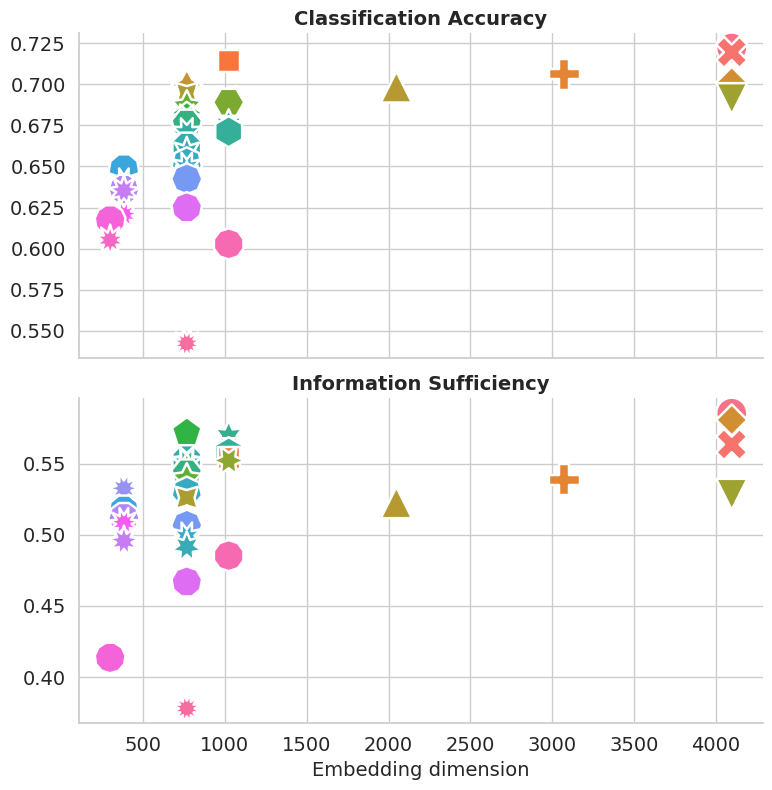

In [6]:
# plot rankings and value function of the dimension
#rename

rankings['Ranking Method'] = rankings['ranking'].map({"informativeness": "Information Sufficiency", "classification": "Classification Accuracy", "classification_entropy": "Classification Entropy"})
rankings['Embedding dimension'] = rankings['dim']
g = sns.relplot(data=rankings, x='Embedding dimension', y='value', hue='model', col='Ranking Method', s=500, height=4, aspect=2, kind='scatter', facet_kws={'sharey': False}, style='model', legend=False, col_wrap=1)

# Change titles of relplot 
g.set_titles(col_template="{col_name}")

# make text bigger
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=20, fontweight='bold')
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel('', fontsize=16)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)
        
    # legend bigger
    



In [7]:


path = Path(f"../../../papers/emir-embedding-comparison/fig/nlp/{PREFIX}_size_perf_info_{sanitize_metric_name(METRIC)}.pdf")
path.parent.mkdir(parents=True, exist_ok=True)
g.fig.savefig(path, bbox_inches='tight')

